In [1]:
from timeit import default_timer as timer

import numpy as np
from matplotlib import pyplot as plt

import acsbm

In [2]:
def run_simulation(model, ndd, n, ignore_covariates=False, ignore_communities=False):
    net = acsbm.generate_network(model, ndd, n)

    k = 1 if ignore_communities else model.n_communities
    d = len(net.block_sizes)

    # Show model, network
    if n <= 1000:
        plt.matshow(net.A.toarray())
    plt.matshow(model.B_tilde())
    plt.colorbar()

    # Cluster!
    start = timer()
    c_result = acsbm.cluster(net, k, d, ignore_covariates)
    end = timer()
    
    # Report clustering accuracy only if not ignoring communities (in which case accuracy is meaningless)
    if not ignore_communities:
        print(f"Accuracy: {acsbm.label_accuracy(c_result.theta, net.theta)}")
        print(f"Clustering Time: {end-start}")

    # Estimate coefficients (unless ignoring covariates)
    if not ignore_covariates:
        start = timer()
        e_result = acsbm.estimate(net, c_result)
        end = timer()

        plt.matshow(e_result.B_star)
        plt.colorbar()
        plt.matshow(e_result.B_hat)
        plt.colorbar()

        print(f"Coefficients: {e_result.coefficients}")
        print(f"Estimation Time: {end-start}")

# Example 1: Three Binary Covariates with Mixed Homophily Effects

Accuracy: 1.0
Clustering Time: 1.8341155810048804


/usr/local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The log link function does not respect the domain of the Binomial family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Coefficients: [ 0.60957106 -0.49468752  0.09287674]
Estimation Time: 0.12841754098189995


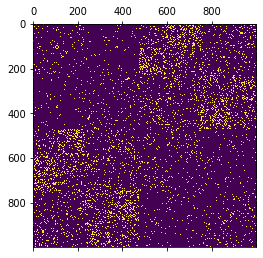

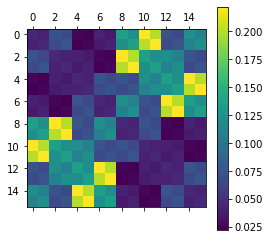

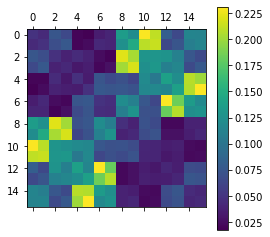

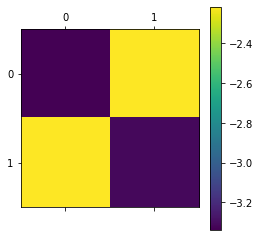

In [3]:
model = acsbm.MultiCovariateModel(
    B=np.log(-0.2 * np.eye(2) + 0.3) - 1,
    covariates=[
        acsbm.Covariate.simple(0.6, 2),
        acsbm.Covariate.simple(-0.5, 2),
        acsbm.Covariate.simple(0.1, 2)
    ],
    link=acsbm.LinkFunction.log()
)
ndd = acsbm.NodeDataDistribution.uniform_for_model(model)

run_simulation(model, ndd, 1000) # note: works fine with ignore_covariates=True or ignore_communities=True

# Example 2: Similar to the Simpson's Paradox Example

Accuracy: 1.0
Clustering Time: 0.4715616889880039
Coefficients: [-0.97952448]
Estimation Time: 0.06550921901362017


/usr/local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The log link function does not respect the domain of the Binomial family.
  warnings.warn((f"The {type(family.link).__name__} link function "


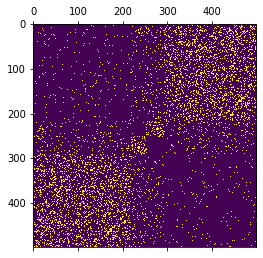

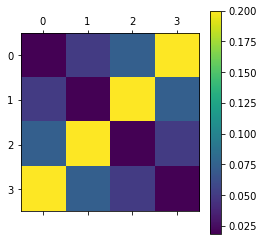

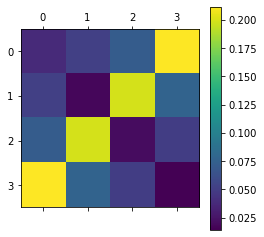

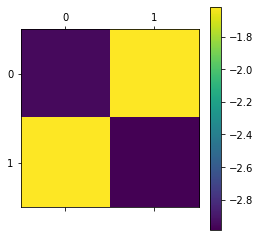

In [4]:
model = acsbm.MultiCovariateModel(
    B=np.log(-.15 * np.eye(2) + 0.2),
    covariates=[acsbm.Covariate.simple(-1, 2)],
    link=acsbm.LinkFunction.log()
)
ndd = acsbm.NodeDataDistribution(np.array([
    [6, 1],
    [1, 6]
]))

run_simulation(model, ndd, 500, ignore_communities=False) # ignore_communities=True results in biased estimate

# Example 3: Covariate Effect Dwarfs Latent Community Structure

Accuracy: 0.507
Clustering Time: 0.30894672399153933


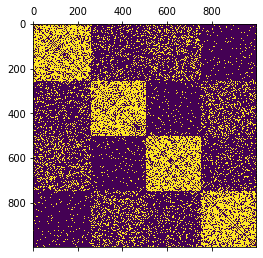

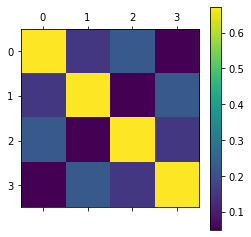

In [5]:
model = acsbm.MultiCovariateModel(B=np.log(.1 * np.eye(2) + 0.05), covariates=[acsbm.Covariate.simple(1.5, 2)], link=acsbm.LinkFunction.log())
ndd = acsbm.NodeDataDistribution.uniform_for_model(model)

run_simulation(model, ndd, 1000, ignore_covariates=True) # ignore_covariates results in terrible accuracy

## Example 3b: Simpson's Paradox

Accuracy: 1.0
Clustering Time: 0.3089262479916215


/usr/local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The log link function does not respect the domain of the Binomial family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Coefficients: [-0.48320295]
Estimation Time: 0.1528793860343285


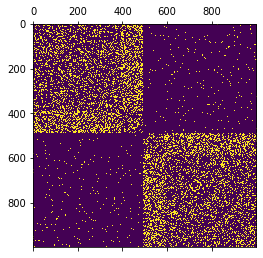

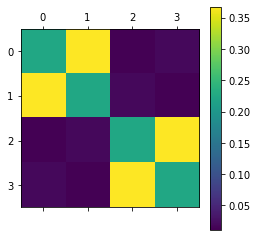

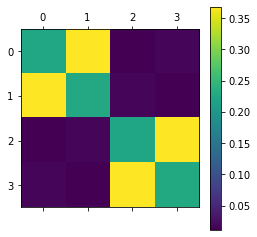

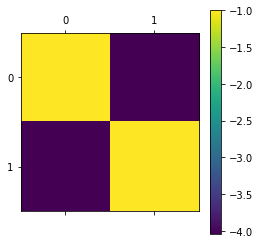

In [6]:
model = acsbm.MultiCovariateModel(B=(3 * np.eye(2) - 4), covariates=[acsbm.Covariate.simple(-0.5, 2)], link=acsbm.LinkFunction.log())
ndd = acsbm.NodeDataDistribution(np.array([[4, 1], [1, 4]]))

run_simulation(model, ndd, 1000) # ignore_communities = True flips sign of estimated coefficient

# Example 4: Random pmf, Two Covariates

Accuracy: 1.0
Clustering Time: 0.7267883670283481
Coefficients: [ 0.49328557 -0.49722784]
Estimation Time: 0.06728394201491028


/usr/local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The log link function does not respect the domain of the Binomial family.
  warnings.warn((f"The {type(family.link).__name__} link function "


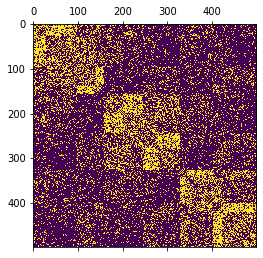

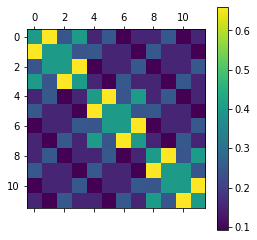

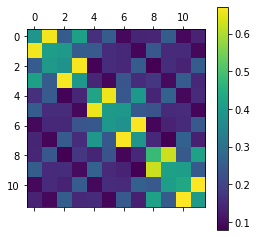

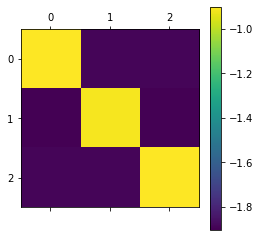

In [7]:
model = acsbm.MultiCovariateModel(
    B=np.log(.25 * np.eye(3) + 0.15),
    covariates=[acsbm.Covariate.simple(0.5, 2), acsbm.Covariate.simple(-0.5, 2)],
    link=acsbm.LinkFunction.log()
)
ndd = acsbm.NodeDataDistribution.random_for_model(model)

run_simulation(model, ndd, 500)

# Example 5: Logit

Accuracy: 1.0
Clustering Time: 2.853592525993008
Coefficients: [ 1.99121393 -1.01962829  0.49699758]
Estimation Time: 0.19826850696699694


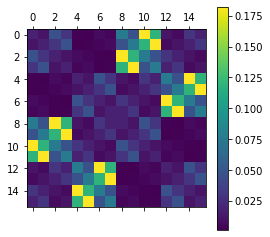

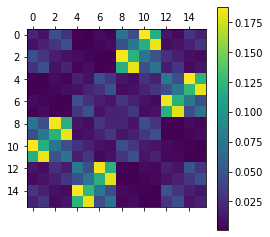

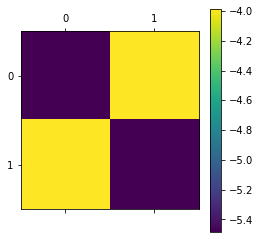

In [8]:
model = acsbm.MultiCovariateModel(
    B=-1.5 * np.eye(2) - 4,
    covariates=[acsbm.Covariate.simple(2, 2), acsbm.Covariate.simple(-1, 2), acsbm.Covariate.simple(0.5, 2)],
    link=acsbm.LinkFunction.logit()
)
ndd = acsbm.NodeDataDistribution.uniform_for_model(model)

run_simulation(model, ndd, 2000) # ignore_covariates = True breaks accuracy

# Example 6: Non-Symmetric Underlying SBM

Accuracy: 1.0
Clustering Time: 1.1733762609655969


/usr/local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The log link function does not respect the domain of the Binomial family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Coefficients: [ 0.50648396 -0.52636146]
Estimation Time: 0.10632484103552997


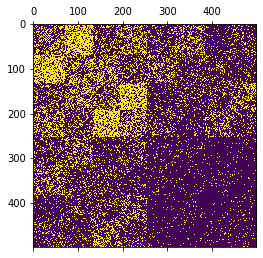

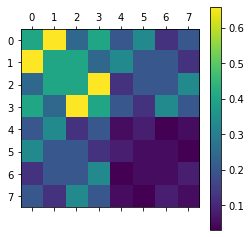

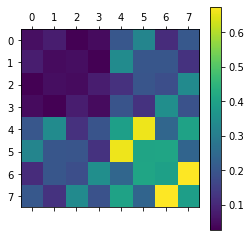

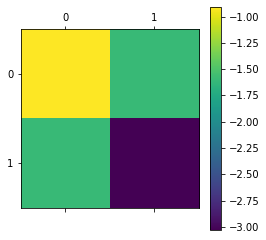

In [9]:
model = acsbm.MultiCovariateModel(
    B=np.log(np.array([
        [0.4, 0.2],
        [0.2, 0.05]
    ])),
    covariates=[acsbm.Covariate.simple(0.5, 2), acsbm.Covariate.simple(-0.5, 2)],
    link=acsbm.LinkFunction.log()
)
ndd = acsbm.NodeDataDistribution.uniform_for_model(model)

run_simulation(model, ndd, 500) # ignore_covariates=True hurts accuracy

# Example 7: Probit Link

Accuracy: 1.0
Clustering Time: 3.2103562710108235
Coefficients: [ 0.89997138 -0.70099096  0.10637278]
Estimation Time: 0.19668895396171138


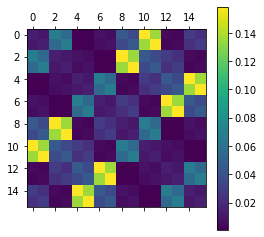

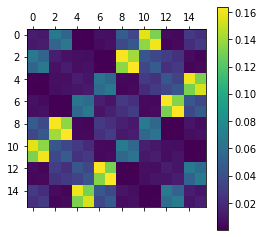

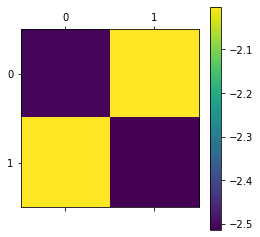

In [10]:
model = acsbm.MultiCovariateModel(
    B=-0.5 * np.eye(2) - 2,
    covariates=[
        acsbm.Covariate.simple(0.9, 2),
        acsbm.Covariate.simple(-0.7, 2),
        acsbm.Covariate.simple(0.1, 2)
    ],
    link=acsbm.LinkFunction.probit()
)
ndd = acsbm.NodeDataDistribution.uniform_for_model(model)

run_simulation(model, ndd, 2000) # ignore_covariates=True hurts accuracy

# Example 8: Identity Link

Accuracy: 0.999
Clustering Time: 3.3259646520018578


/usr/local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The identity link function does not respect the domain of the Binomial family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Coefficients: [ 0.19644236 -0.19975026  0.00933286]
Estimation Time: 0.3258341929758899


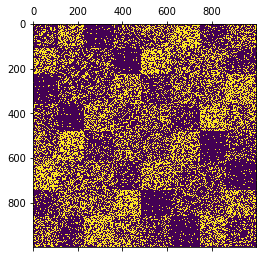

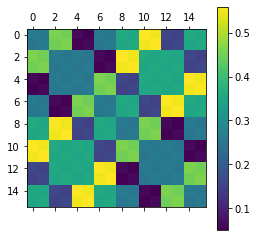

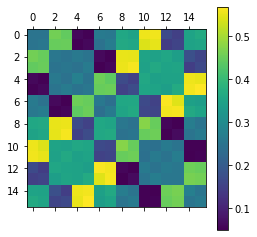

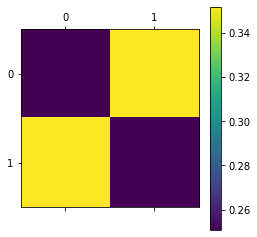

In [11]:
model = acsbm.MultiCovariateModel(
    B=-0.1 * np.eye(2) + 0.35,
    covariates=[
        acsbm.Covariate.simple(0.2, 2),
        acsbm.Covariate.simple(-0.2, 2),
        acsbm.Covariate.simple(0.01, 2)
    ],
    link=acsbm.LinkFunction.identity()
)
ndd = acsbm.NodeDataDistribution.uniform_for_model(model)

run_simulation(model, ndd, 1000, ignore_covariates=False) # ignore_covariates=True hurts accuracy